In [1]:
!pip install mlxtend

In [16]:
import mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
df=pd.read_csv("/content/Online retail0.csv")
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,"shrimp,almonds,avocado,vegetables mix,green gr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"burgers,meatballs,eggs",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"turkey,avocado",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"mineral water,milk,energy bar,whole wheat rice...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,"butter,light mayo,fresh bread",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,"burgers,frozen vegetables,eggs,french fries,ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,"escalope,green tea",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
import pandas as pd

# Drop columns with all NaN values
df_cleaned = df.dropna(axis=1, how='all')

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Convert transactions into a list of lists
transactions = df_cleaned[df_cleaned.columns[0]].apply(lambda x: x.split(',')).tolist()
df_cleaned


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7493,"burgers,salmon,pancakes,french fries,frozen sm..."
7494,"turkey,burgers,dessert wine,shrimp,pasta,tomat..."
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."


In [45]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(mineral water),0.205178,0.299845,0.073223,0.356874,1.190193,0.011701,1.088674,0.201051
1,(mineral water),(chocolate),0.299845,0.205178,0.073223,0.244201,1.190193,0.011701,1.051632,0.228235
2,(chocolate),(spaghetti),0.205178,0.229521,0.055835,0.272128,1.185635,0.008742,1.058537,0.196988
3,(spaghetti),(chocolate),0.229521,0.205178,0.055835,0.243266,1.185635,0.008742,1.050332,0.203212
4,(mineral water),(eggs),0.299845,0.208076,0.070131,0.233892,1.124070,0.007741,1.033698,0.157645
5,(eggs),(mineral water),0.208076,0.299845,0.070131,0.337047,1.124070,0.007741,1.056115,0.139377
6,(spaghetti),(eggs),0.229521,0.208076,0.051391,0.223906,1.076078,0.003633,1.020397,0.091760
7,(eggs),(spaghetti),0.208076,0.229521,0.051391,0.246982,1.076078,0.003633,1.023189,0.089275
8,(frozen vegetables),(mineral water),0.129830,0.299845,0.050425,0.388393,1.295310,0.011496,1.144778,0.262000
9,(mineral water),(frozen vegetables),0.299845,0.129830,0.050425,0.168170,1.295310,0.011496,1.046091,0.325620


In [37]:
rules.sort_values('confidence',ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(ground beef),(mineral water),0.135819,0.299845,0.058733,0.432432,1.442184,0.018008,1.233606,0.354795
13,(ground beef),(spaghetti),0.135819,0.229521,0.055835,0.411095,1.791102,0.024661,1.308326,0.511102
15,(milk),(mineral water),0.170015,0.299845,0.067813,0.398864,1.330231,0.016835,1.164718,0.299103
8,(frozen vegetables),(mineral water),0.129830,0.299845,0.050425,0.388393,1.295310,0.011496,1.144778,0.262000
18,(spaghetti),(mineral water),0.229521,0.299845,0.085008,0.370370,1.235204,0.016187,1.112010,0.247141
0,(chocolate),(mineral water),0.205178,0.299845,0.073223,0.356874,1.190193,0.011701,1.088674,0.201051
5,(eggs),(mineral water),0.208076,0.299845,0.070131,0.337047,1.124070,0.007741,1.056115,0.139377
17,(milk),(spaghetti),0.170015,0.229521,0.050039,0.294318,1.282316,0.011017,1.091822,0.265259
19,(mineral water),(spaghetti),0.299845,0.229521,0.085008,0.283505,1.235204,0.016187,1.075345,0.271965
2,(chocolate),(spaghetti),0.205178,0.229521,0.055835,0.272128,1.185635,0.008742,1.058537,0.196988


In [47]:
top_rules = rules.sort_values(by='lift', ascending=False).head(10)
top_rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,(ground beef),(spaghetti),0.135819,0.229521,0.055835,0.411095,1.791102,0.024661,1.308326,0.511102
12,(spaghetti),(ground beef),0.229521,0.135819,0.055835,0.243266,1.791102,0.024661,1.141988,0.573260
11,(ground beef),(mineral water),0.135819,0.299845,0.058733,0.432432,1.442184,0.018008,1.233606,0.354795
10,(mineral water),(ground beef),0.299845,0.135819,0.058733,0.195876,1.442184,0.018008,1.074686,0.437914
14,(mineral water),(milk),0.299845,0.170015,0.067813,0.226160,1.330231,0.016835,1.072553,0.354566
15,(milk),(mineral water),0.170015,0.299845,0.067813,0.398864,1.330231,0.016835,1.164718,0.299103
8,(frozen vegetables),(mineral water),0.129830,0.299845,0.050425,0.388393,1.295310,0.011496,1.144778,0.262000
9,(mineral water),(frozen vegetables),0.299845,0.129830,0.050425,0.168170,1.295310,0.011496,1.046091,0.325620
17,(milk),(spaghetti),0.170015,0.229521,0.050039,0.294318,1.282316,0.011017,1.091822,0.265259
16,(spaghetti),(milk),0.229521,0.170015,0.050039,0.218013,1.282316,0.011017,1.061380,0.285745


In [49]:
#Focus on items where 'mineral water' is in the antecedent
focus_rules = rules[rules['antecedents'].apply(lambda x: 'mineral water' in x)]
focus_rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(mineral water),(chocolate),0.299845,0.205178,0.073223,0.244201,1.190193,0.011701,1.051632,0.228235
4,(mineral water),(eggs),0.299845,0.208076,0.070131,0.233892,1.124070,0.007741,1.033698,0.157645
9,(mineral water),(frozen vegetables),0.299845,0.129830,0.050425,0.168170,1.295310,0.011496,1.046091,0.325620
10,(mineral water),(ground beef),0.299845,0.135819,0.058733,0.195876,1.442184,0.018008,1.074686,0.437914
14,(mineral water),(milk),0.299845,0.170015,0.067813,0.226160,1.330231,0.016835,1.072553,0.354566
19,(mineral water),(spaghetti),0.299845,0.229521,0.085008,0.283505,1.235204,0.016187,1.075345,0.271965


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


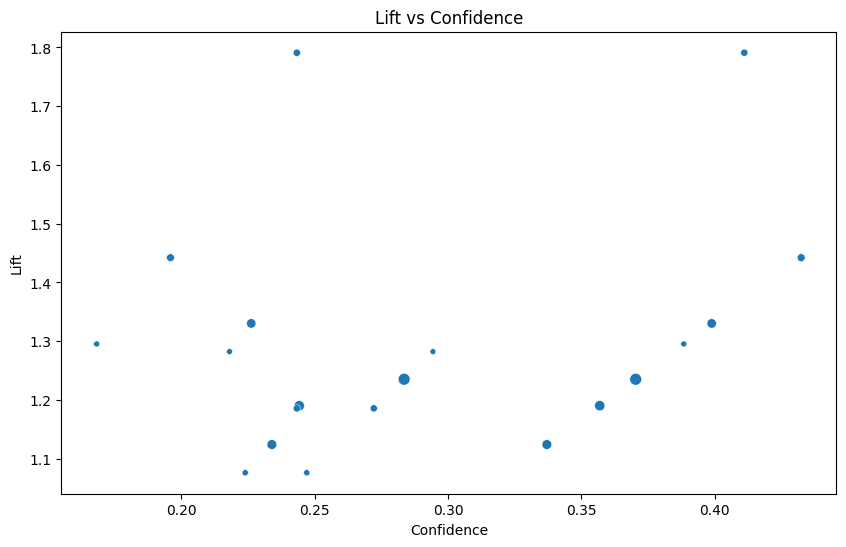

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Lift vs Confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='confidence', y='lift', size='support', data=rules, legend=False)
plt.title('Lift vs Confidence')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()


In [ ]:
'''  Q .1. What is Lift and Why is it Important in Association Rules?

Lift is a measure used in association rule mining to evaluate the strength of a rule over the baseline probability of occurrence of the items.
It is defined as the ratio of the observed support of the items in a rule to the expected support if the items were independent.

Importance of Lift:
Interpreting Relationships: Lift helps in understanding how much more likely items 𝐴 and B are to be bought together
compared to being bought independently.

Identifying Strong Associations: A lift value greater than 1 indicates a positive correlation,
meaning the occurrence of one item increases the likelihood of the other.

Prioritizing Rules: Lift is crucial in filtering and prioritizing the most interesting and actionable association rules,
especially in large datasets where many rules might be generated.​'''


In [ ]:
''' Q.2. What is Support and Confidence?

Support:
Support measures how frequently the items in a rule appear together in the dataset.
It reflects the proportion of transactions in the dataset that contain the itemset.

Confidence:
Confidence measures how often items in B appear in transactions that contain A.
It indicates the likelihood that item B is purchased when item A is purchased.'''

In [ ]:
''' Q.3 .What Are Some Limitations or Challenges of Association Rules Mining?
While association rule mining is a powerful technique, it comes with several limitations and challenges:

1. High Dimensionality:
Large Rule Sets: In datasets with many items, the number of possible rules can be enormous,
leading to computational challenges and difficulties in managing and interpreting the rules.
Sparse Data: In high-dimensional spaces, many item combinations might have very low support,
 making it challenging to find significant rules.

2. Choosing the Right Thresholds:
Threshold Sensitivity: The results of association rule mining are highly sensitive to the choice of minimum support,
confidence, and lift thresholds. Setting these values too high might result in missing interesting patterns, while setting them too low might produce too many irrelevant rules.

3. Redundancy and Interpretability:
Redundant Rules: Association rule mining can generate many redundant rules that are variations of the same itemsets,
making it hard to distill the truly important patterns.
Interpretability: Interpreting large sets of association rules can be difficult,
especially when dealing with complex itemsets or rules with low lift, which may not be meaningful.

4. Scalability Issues:
Performance: As the dataset grows, the computational resources required to process and generate rules can become prohibitive. Algorithms like Apriori require multiple scans of the dataset, which may not scale well with very large datasets.

6. Assumption of Independence:
Independence Assumption: The algorithms often assume that itemsets are independent, which may not always be true in real-world scenarios.
This can lead to misleading rules when items are dependent but not frequently co-occurring.
